
# Fake News Detector

_By Georgie Zaguirre_
<br>
<br>
__Technical presentation:__<br>
https://docs.google.com/presentation/d/1jOpLNqWjkVkh0Lt82dq2hCda06rtR3S0OnCSMTP6ARo/edit?usp=sharing

## Section 1: Executive Summary
---
### Project goals
-  Predict Fake News articles using supervised learning with NLP
-  Perform Sentiment Analysis to predict whether a news article is positive, negative or neutral using unsupervised learning

### Metrics
-  Accuracy Score and Confusion Matrix
-  Assessment of sentiment using polarity scores for selected news articles

### Key findings
-  The model can predict Fake News with <font color=blue> __93%  accuracy__</font>, with Logistic Regression as the best performing algorithm
-  Fake News headlines are longer in length than Real News articles
-  Real News body of text are nearly twice as long as Fake News articles
-  Headlines or frequent words are similar between Fake News and Real News
-  Using compound polarity scores, there are more Positive counts of news articles than Negative and Neutral 
-  The overall sentiment with both Real News and Fake News are generally Neutral
-  Using the metadata of news articles and combination of both the supervised and unsupervised learning makes it possible to classify Fake News with good accuracy

### Risks, limitations and assumptions

-  It is assummed that Real News are articles published by traditional media organisations such as BBC, CNN, Fox News, Reuters and New York Times while Fake News are published by less known publications or websites such as Moveon.org, Beforeitnews.com and Change.org<br>
-  There is a risk that the model is biased towards Fake News and certain topics. Many of the news articles in the dataset were written during the 2016 US Election campaign - a time when there was a large spread of propaganda and misleading information for political purposes.<br>
-  Since this is a binary classification, the model does not go as far as predicting bias, satire or conspiracy. It assumes that these classes falls under Fake News
-  The news articles in the dataset are mostly political in nature. Wider coverage could include topics such as science, sports, environment etc.<br>
-  Sources of data gathered are limited to websites. Data should also be sourced from social media such as Facebook and Twitter, given that spread of Fake News are quickly spread by these platforms. 
---

## Section 2: Model Walkthrough

This section will walk through the steps taken to:

-  Import libraries to be used. Mainly Plotly was used for visualisations
-  Cleaning, Pre-processing and EDA
-  Calculate the Baseline accuracy
-  Analyse and compare data between the two classes Fake News and Real News
-  Analyse outliers
-  Visualise the most frequent words used, using WordCloud
---

### Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly
import plotly.graph_objs as go
import plotly.plotly as py

# set to offline mode
init_notebook_mode(connected=True)

### Cleaning, Pre-processing and EDA

In [ ]:
# Load new dataset 
data = pd.read_csv('more.csv', encoding='iso-8859-1')

# Inspect the columns 
data.head(5)

In [ ]:
# Check the shape
data.shape

In [4]:
# Drop nulls
data.dropna(inplace=True)

In [5]:
# Check count of fake and real

label_count = data['Label']
label_count.value_counts()

0    5170
1    4984
Name: Label, dtype: int64

In [6]:
# Since we're predicting fake news which is currently represented with a value of 0, swap values of Label where 0 represents real and 1 represents fake and represent as a new column label

data['Type'] = len([])

data.loc[data['Label'] == 0, 'Type'] = 1
data.loc[data['Label'] == 1, 'Type'] = 0

data.head(5)

,URLs,Headline,Body,Label,Type
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",0,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,0


In [7]:
# Remove old Label column
data = data.drop('Label', axis =1)
data.head()

,URLs,Headline,Body,Type
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [8]:
# Re-check count of fake and real

type_count = data['Type']
print(type_count.value_counts())

1    5170
0    4984
Name: Type, dtype: int64


#### Calculate the Baseline Accuracy - the proportion of majority class

In [9]:
# Baseline

value_counts = type_count.value_counts()
baseline = type_count.value_counts() / type_count.count()

print(type_count.value_counts())
print(baseline)
print("The baseline accuracy is " + str(baseline[1] *100))

1    5170
0    4984
Name: Type, dtype: int64
1    0.509159
0    0.490841
Name: Type, dtype: float64
The baseline accuracy is 50.915895213708886


#### Exploratory Data Analysis on Fake News and Real News

In [10]:
# Initialise the counts of Fake News and Real News

fake_counts = value_counts[1]
real_counts = value_counts[0]

#### Visualise the counts to check if there's imbalanced data

In [11]:
# Create pie chart

labels = ['Fake','Real']
values = [fake_counts, real_counts]

trace = go.Pie(labels=labels, values=values,  textfont=dict(size=14))

layout=go.Layout(title="Fake vs Real", height=500, width=500)
figure=go.Figure(data=[trace],layout=layout)

plotly.offline.iplot(figure, show_link=False,  filename='basic_pie_chart')


#### Analyse the length of the headlines and body of the news articles
_Q: Are there differences in the length between Fake News and Real News?_

In [12]:
# Create new columns for Headline length and Body Length

data['Head_length'] = [len(headline) for headline in data['Headline']]
data['Body_length'] = [len(str(x)) for x in data['Body']]

data.head()

,URLs,Headline,Body,Type,Head_length,Body_length
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,30,7598
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,85,2676
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,43,2567
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",1,84,2696
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,48,1840


In [13]:
# Describe the data
data.describe()

,Type,Head_length,Body_length
count,10154.000000,10154.000000,10154.000000
mean,0.509159,63.677861,3951.635415
std,0.499941,23.793974,3827.161379
min,0.000000,1.000000,10.000000
25%,0.000000,49.000000,1293.250000
50%,1.000000,62.000000,3015.000000
75%,1.000000,75.000000,5517.750000
max,1.000000,653.000000,32570.000000


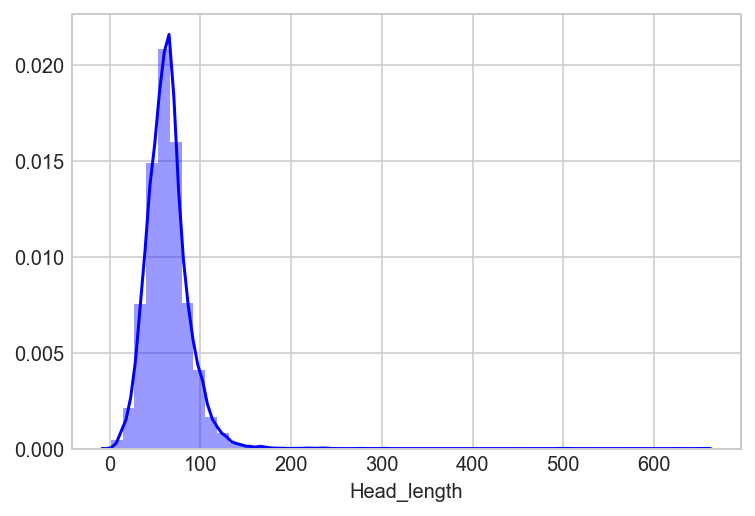

In [14]:
# Plot the distribution of Headline length 
sns.distplot(data['Head_length'], color = 'blue')

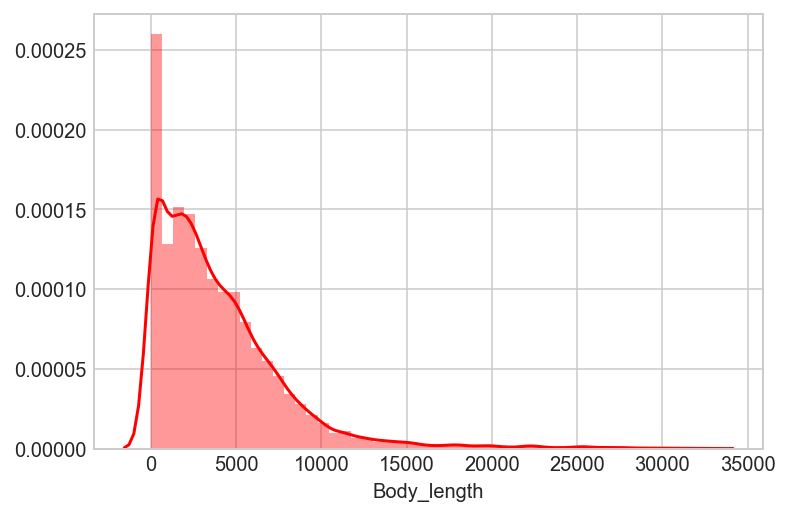

In [15]:
# Plot the distribution of Headline length 
sns.distplot(data['Body_length'], color = 'red')

#### _The distribution plots showed us that Headline length follow a normal distribution and Body length is rightly skewed. To visualise the difference in the length of headline and body between Fake News and Real News, the median will be used for comparison_

In [16]:
# Split up data between Fake and Real

fake_data = data[data['Type'] == 1]
real_data= data[data['Type'] == 0]

In [17]:
# Initialise the Median Headline lengths
fake_head = fake_data['Head_length'].median()
real_head = real_data['Head_length'].median()

In [18]:
# Initialise the Median Body lengths
fake_body = fake_data['Body_length'].median()
real_body = real_data['Body_length'].median()

#### _The below visualisation shows us that median length of Fake News headlines are slightly longer than Real News_

In [19]:
# Plot the median length of headlines

trace1 = go.Bar(
    x=['Fake'],
    y=[fake_head ],
    name='Fake'
)
trace2 = go.Bar(
    x=['Real'],
    y=[real_head],
    name='Real'
)
data_1 = [trace1, trace2]
layout = go.Layout(title="Median Length of Headlines", 
    barmode='group', height=500, width=500 
)
fig = go.Figure(data=data_1, layout=layout)
plotly.offline.iplot(fig, show_link = False, filename='grouped-bar')

#### _The below visualisation shows that Real News body of text are nearly twice as long as Fake News articles_

In [20]:
# Plot the median length of Body of text

trace1 = go.Bar(
    x=['Fake'],
    y=[fake_body],
    name='Fake'
)
trace2 = go.Bar(
    x=['Real'],
    y=[real_body],
    name='Real'
)

data_2 = [trace1, trace2]
layout = go.Layout(title="Median Length of Body", 
    barmode='group', height=500, width=500 
)

fig = go.Figure(data=data_2, layout=layout)
plotly.offline.iplot(fig, show_link = False, filename='grouped-bar')

#### Examine  and Visualise Outliers
_Q: How many outliers are there. Do outliers need to be removed?_

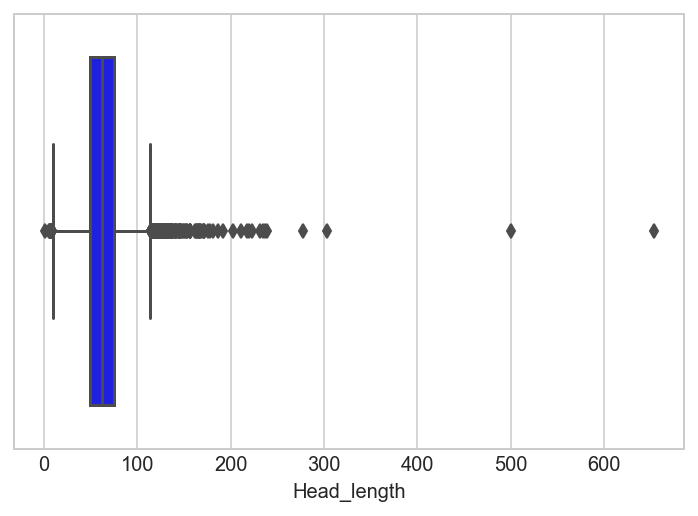

In [21]:
# Visualise outliers for Head_length
sns.boxplot(data['Head_length'], color = 'blue')

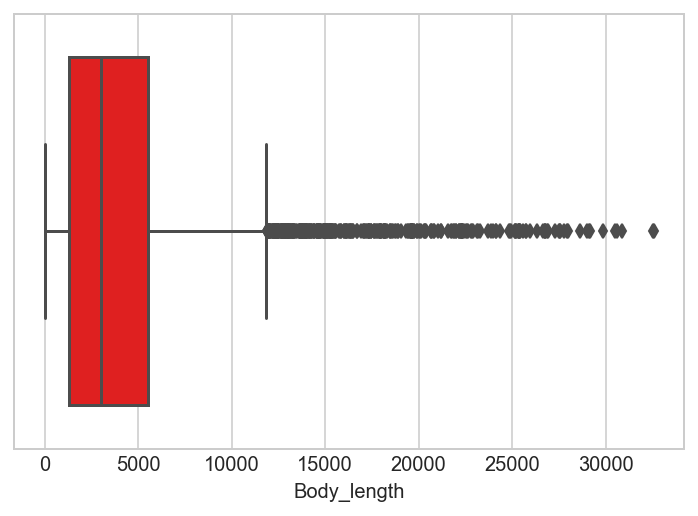

In [22]:
# Visualise outliers for Body_length
sns.boxplot(data['Body_length'], color = 'red')

In [23]:
# Show outliers (outside the 90 percentile of both Head_length and Body_length)

print(data.quantile(q=0.9))

Type              1.0
Head_length      92.0
Body_length    8272.1
Name: 0.9, dtype: float64


In [24]:
# Check the count of articles above the 0.9 percentile

head_quantile = data["Head_length"].quantile(0.9)
body_quantile = data["Body_length"].quantile(0.9)
head_outliers = data[data["Head_length"] > head_quantile]
body_outliers = data[data["Body_length"] > body_quantile]
combined_outliers = pd.concat([head_outliers, body_outliers], axis=0)

print(" There are " + str(combined_outliers['URLs'].count()) + " news articles above the 0.9 percentile")

 There are 1973 news articles above the 0.9 percentile


#### _Based on the outlier analysis above, there are too many outliers to be dropped from the dataset. Only the body of text will be selected using NLP to make predictions and perform sentiment analysis. Therefore, it is not necessary to remove outliers for Headline length or Body length_

#### Generate WordCloud -  Extract Most Frequent Words from Headlines
_Q: What are the differences between Fake News and Real News?_

In [52]:
# Clean Headline and Body by removing digits

data.Headline = data.Headline.str.replace('[0-9]','') # removes digits
data.Body = data.Body.str.replace('[0-9]','') # removes digits
data.Headline = data.Headline.str.replace('Trumpâ','Trump') 
data.Body = data.Body.str.replace('Trumpâ','Trump') 
data.Headline = data.Headline.str.replace('Hillaryâ','Hillary')
data.Body = data.Body.str.replace('Hillaryâ','Hillary') 
data.Body = data.Body.str.replace('theâ','') 
data.Headline = data.Headline.str.replace('theâ','the') 

In [53]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.corpus import stopwords

nltk_stops = stopwords.words()
custom_stop_words = list(ENGLISH_STOP_WORDS)

In [54]:
# Below is a list of words to be removed and appended to custom_stop_words

remove_list = ['Reuters', 'CNN', 'BBC', 'Cnn','reuters','Bbc', 'cnn','bbc','beforeitsnews','Beforeitsnews','before','Before','itsnews', 'news', 'main','com','www','http','https','News','conservativedailynews']

for values in remove_list:
    custom_stop_words.append(values)

#### a. WordCloud for all Headlines

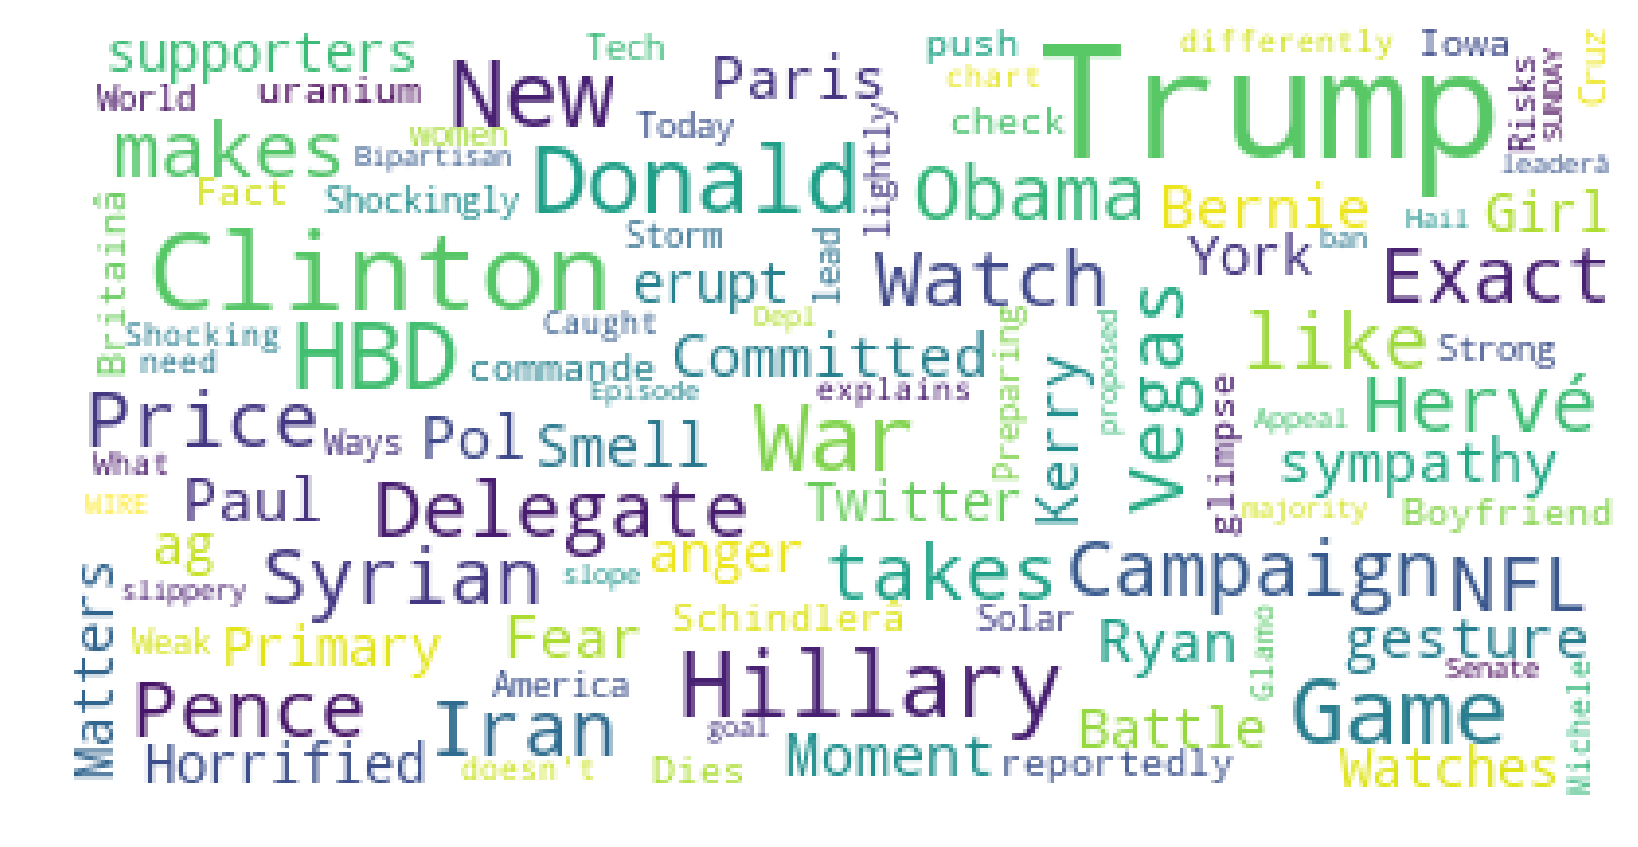

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(14.0,14.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)


wordcloud_all = WordCloud(
                          background_color='white',
                          stopwords=custom_stop_words,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data.Headline))

print(wordcloud_all)
fig = plt.figure(1)
plt.imshow(wordcloud_all)
plt.axis('off')
plt.show()

#### b. WordCloud for Fake headlines

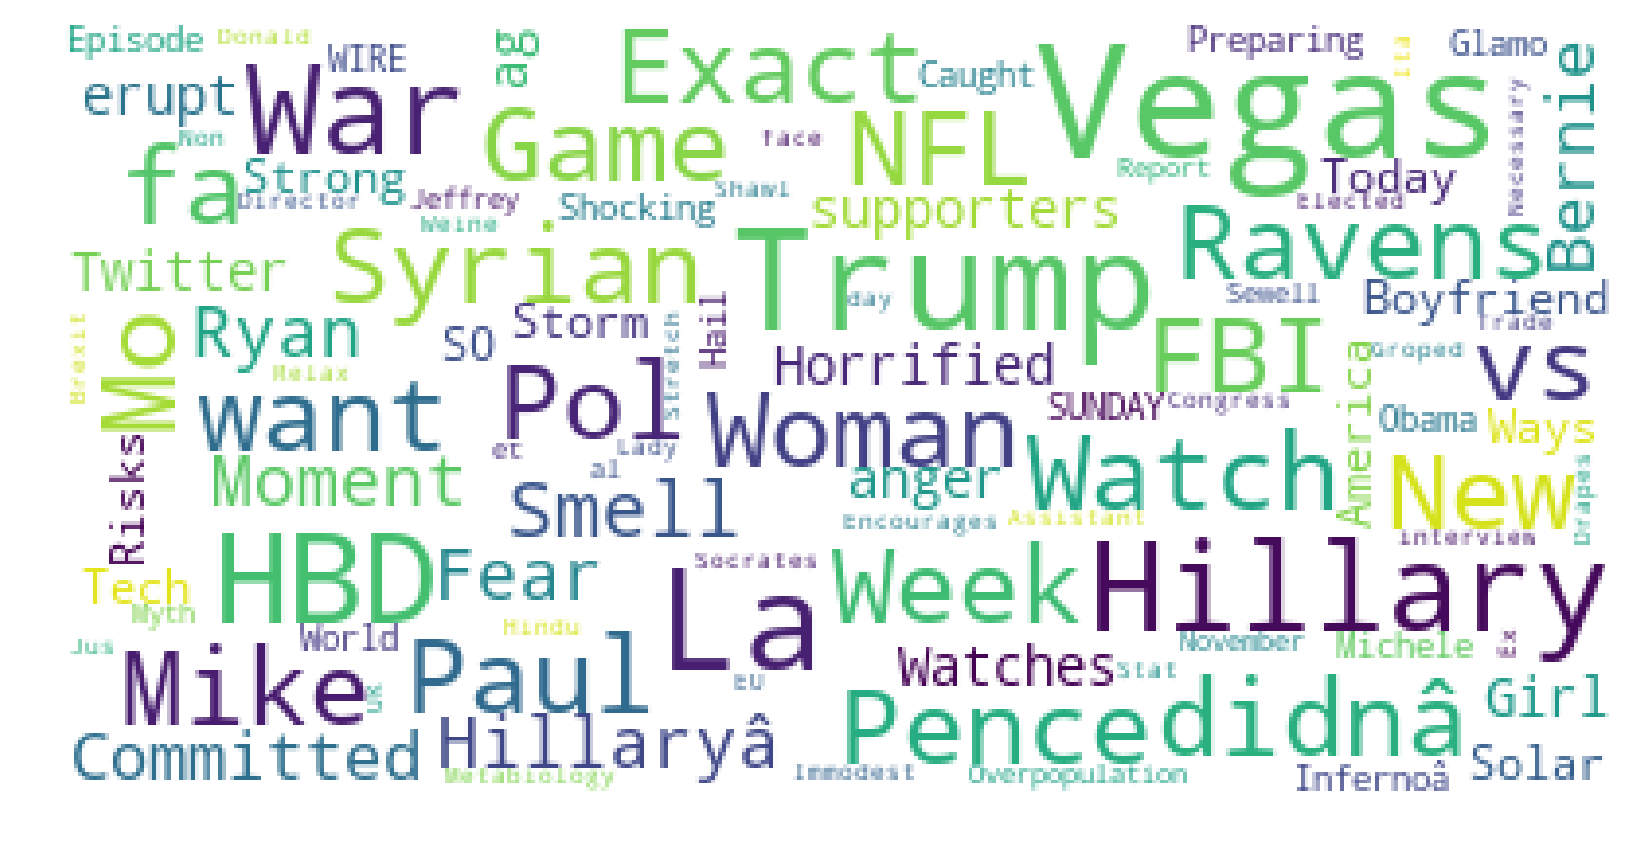

In [56]:
wordcloud_fake = WordCloud(
                          background_color='white',
                          stopwords=custom_stop_words,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(fake_data.Headline))

print(wordcloud_fake)
fig = plt.figure(1)
plt.imshow(wordcloud_fake)
plt.axis('off')
plt.show()

#### c. WordCloud for Real News Headlines

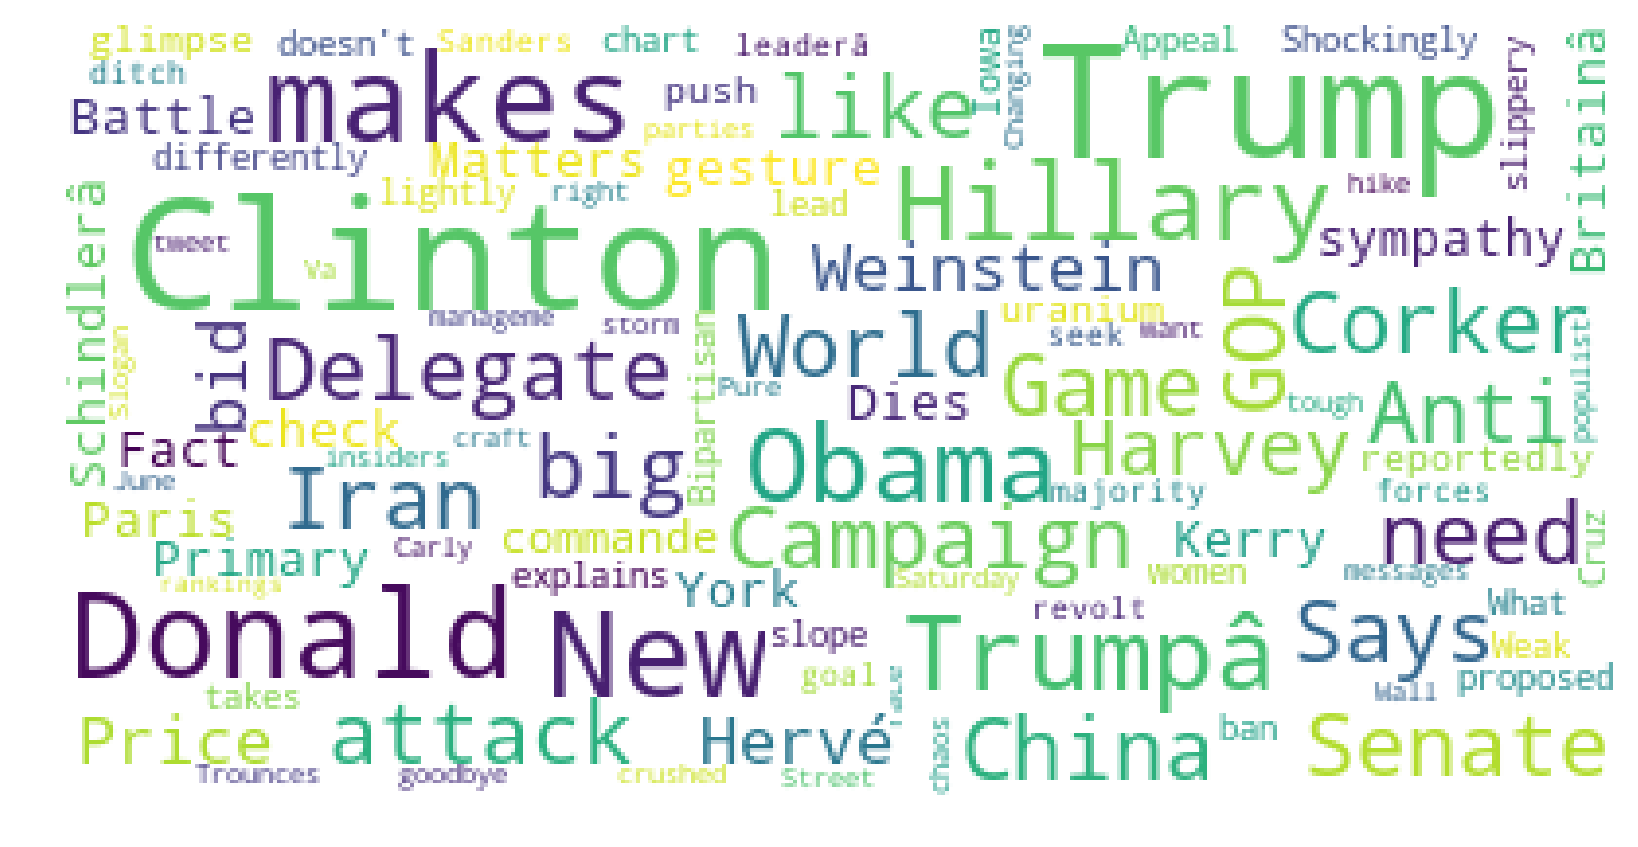

In [57]:
wordcloud_real = WordCloud(
                          background_color='white',
                          stopwords=custom_stop_words,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(real_data.Headline))

print(wordcloud_real)
fig = plt.figure(1)
plt.imshow(wordcloud_real)
plt.axis('off')
plt.show()

---

## Section 3: Statistical Analysis and Predictive Modelling

This section will include steps and implementation of the following:

-  Pre-processing and data preparation
-  Vectorizing features using two options: CountVectorizer or TfidfVectorizer
-  Model selection and evaluation of selected models for Fake News Detection
-  Tune model using GridSearchCV
-  Visualisation of the most informative features or words
-  Demo of the Fake News Detector using real articles
---

#### Prepare data for predictive modelling

In [58]:
# Copy original dataframe and create new one. Remove URLs and Label from DataFrame. Label will be used as the predicted variable 

new_df = pd.DataFrame(data, columns = ['Headline', 'Body', 'Head_length', 'Body_length'])
new_df.head()

,Headline,Body,Head_length,Body_length
0,You Can Smell Hillarys Fear,"Daniel Greenfield, a Shillman Journalism Fello...",30,7598
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,85,2676
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,43,2567
3,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November , The ...",84,2696
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,48,1840


In [59]:
# Clean Headline and Body by removing digits

new_df.Headline = new_df.Headline.str.replace('[0-9]','') # removes digits
new_df.Body = new_df.Body.str.replace('[0-9]','') # removes digits
new_df.Headline = new_df.Headline.str.replace('Trumpâ','Trump') 
new_df.Body = new_df.Body.str.replace('Trumpâ','Trump') 
new_df.Headline = new_df.Headline.str.replace('Hillaryâ','Hillary')
new_df.Body = new_df.Body.str.replace('Hillaryâ','Hillary') 
new_df.Body = new_df.Body.str.replace('â','') 
new_df.Headline = new_df.Headline.str.replace('theâ','the')
new_df.Body = new_df.Body.str.replace('theâ','the') 

#### Initialise the predictive value y and X variables

In [60]:
# Initialise 'Type' as the target variable
y = data.Type
len(y)

10154

In [61]:
# Initialise X
X = new_df
len(X)

10154

In [62]:
# Check the columns of X
X.columns

Index(['Headline', 'Body', 'Head_length', 'Body_length'], dtype='object')

#### Split up DataFrame to train (to train the model on) and test sets (for evaluation)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6803, 4) (6803,)
(3351, 4) (3351,)


#### The following are the two options for vectorizing text and will be evaluated for selection
_Q: Are the differences in the number of features or tokens extracted between the two?_

#### _Option 1: Using CountVectorizer_

In [64]:
# Use CountVectorizer to transform text, taking out custom_stopwords

count_vectorizer = CountVectorizer(stop_words=custom_stop_words, decode_error='ignore') # Initialise CountVectorizer

# Fit and transform the training data

count_train = count_vectorizer.fit_transform(X_train['Body'])
print(count_train.shape)

# Transform the test set

count_test = count_vectorizer.transform(X_test['Body'])
print(count_test.shape)


(6803, 66634)
(3351, 66634)


#### _Option 2: Using TfidfVectorizer_

In [65]:
#Use TfidfVectorizer to transform text, taking out custom_stopwords

tfidf_vectorizer = TfidfVectorizer(stop_words= custom_stop_words, max_df=0.8, decode_error='ignore')  # Initialize the TfidfVectorizer

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train['Body']) 
print(tfidf_train.shape)

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test['Body'])
print(tfidf_test.shape)

(6803, 66634)
(3351, 66634)


In [66]:
# Inspect the features from the both vectorizers

count_features = count_vectorizer.get_feature_names()
tfidf_features = tfidf_vectorizer.get_feature_names()

print(count_features[:20])
print(tfidf_features[:20])

['__', '___', '_____', '______', '___________', '____________', '_________________________', '__bfffadfdaaeebdhrcofficecom_', '_bbd', '_blank', '_cornbread_', '_derosa', '_ethanmoore', '_jgdktlmn', '_kvyhphja', '_m', '_nato', '_nytimes', '_obama_says_he_didn', '_ravencamille']
['__', '___', '_____', '______', '___________', '____________', '_________________________', '__bfffadfdaaeebdhrcofficecom_', '_bbd', '_blank', '_cornbread_', '_derosa', '_ethanmoore', '_jgdktlmn', '_kvyhphja', '_m', '_nato', '_nytimes', '_obama_says_he_didn', '_ravencamille']


#### The above examination of both vectorizers showed that both extracted the same number and same features or tokens. At this stage, it cannot be determined which would be better for the predictive models. As a result, both vectorizers will be used on the best performing model to determine which vectorizer is better

---

### Model Selection and Evaluation
This section will include the implementation of a number of classification models and evaluation. Each model used has been evaluated using the metric Accuracy Score

#### Import Accuracy Score and  define function to plot Confusion Matrix

In [67]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools as it

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Model 1: Predict using Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier() # Initiate Decision Tree as the classifier model

clf_dt.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_dt.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.821


#### Model 2: Predict using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression() # Initiate LogisticRegressionas the classifier model

clf_lr.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_lr.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.915


#### Model 3: Predict using Support Vector Machine (SVM)

In [70]:
from sklearn import svm

clf_svm = svm.SVC() # Initiate  Support Vector Machine the classifier model

clf_svm.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_svm.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.508


#### Model 4: Predict using Naive Bayes MultinomialNB Classifier

In [71]:
from sklearn.naive_bayes import MultinomialNB

clf_Mult = MultinomialNB() # Initiate MultinomialNB  as the classifier model

clf_Mult.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_Mult.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.839


#### Model 5: Predict using KNN Classifier

In [72]:
from sklearn import neighbors

clf_KNN = neighbors.KNeighborsClassifier(n_neighbors = 2) # Initiate KNeighboursClassifier as the classifier model

clf_KNN.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_KNN.predict(tfidf_test) # Predict test set

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.808


#### Model 6: Predict using Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

clf_RandomForest = RandomForestClassifier() # Initiate RandomForest as the classifier model

clf_RandomForest.fit(tfidf_train, y_train) # Fit model to the train set

y_pred = clf_RandomForest.predict(tfidf_test) # Predict test set

accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score) # Evaluate test-set accuracy

accuracy:   0.808


#### Model 2a: Predict using LogisticRegression with CountVectorizer

In [74]:
clf_lr = LogisticRegression() # Initiate LogisticRegressionas the classifier model

clf_lr.fit(count_train, y_train) # Fit model to the train set

y_pred_count = clf_lr.predict(count_test) # Predict test set

score = accuracy_score(y_test, y_pred_count)
print("accuracy:   %0.3f" % score)

accuracy:   0.922


#### Model Evaluation:
_After implementing the above models, Logistic Regression has performed the best with accuracy score of 0.92. It has achieved the same using score using both TfidfVectorizer and CountVectorizer_

---

### GridSearchCV on Logistic Regression
This section is for the hyperparameter tuning of Logistic Regression model to improve score. The Confusion Matrix will also be displayed

Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9294428928413935
Confusion matrix


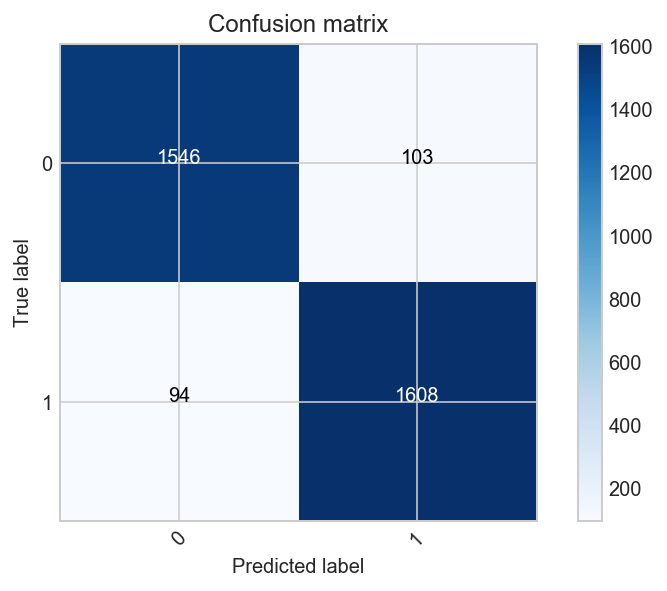

In [75]:
# Import necessary modules

from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(tfidf_train, y_train)

 # Predict test set

y_pred = logreg_cv.predict(tfidf_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

### Extract the most informative features
_Q: What are the most information words for Fake News and Real News?_

In [76]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = tfidf_vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
        

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, clf_lr, n=30)

0 -0.9331564492321779 pushing
0 -0.88737161680834 messenger
0 -0.8509203071677238 unfolds
0 -0.7765090649989361 et
0 -0.7720146275709974 chat
0 -0.7660280145227355 sweeping
0 -0.7606986934178931 caption
0 -0.7317354061237369 dismantling
0 -0.727113185767629 consequences
0 -0.712882479656116 theâ
0 -0.6983811634382565 happening
0 -0.6893521497641009 friday
0 -0.6823487411022877 killing
0 -0.67642835538205 wisconsin
0 -0.6680296710926049 quotes
0 -0.6612093009603716 photos
0 -0.6510907657379112 sen
0 -0.6447419811930024 secretary
0 -0.640569039397104 verdict
0 -0.6394930258600487 numbers
0 -0.6392899026422627 highlights
0 -0.6323284076146518 startups
0 -0.6250140208150736 tuesday
0 -0.622242584562586 message
0 -0.6205060098832665 ll
0 -0.6195742407526668 easier
0 -0.6153982556436898 nomination
0 -0.6152439181866706 saturday
0 -0.5999420567474993 transition
0 -0.5976785920312201 jobs

1 1.421953739890413 source
1 1.2147660904340831 add
1 1.1573422343686155 november
1 1.1185046471905704 cd

#### Extract the top 20 Informative Words for Fake News

In [77]:
### Most informative words for fake
inform_fake = sorted(zip(clf_lr.coef_[0], tfidf_features), reverse=True)[:21]

### Create DataFrame and sort descending

inform_fake_df = pd.DataFrame(data=inform_fake, columns =['coefficient', 'word'] )
inform_fake_df.sort_values(by=['coefficient'], ascending=True,inplace=True)

#### Visualise the top 20 Informative Words for Fake News

In [78]:
data_3 = [go.Bar(
            x= inform_fake_df.coefficient,
            y=inform_fake_df.word,
            orientation = 'h'            
)]

layout_3 = go.Layout(title="The 20 Most Informative Words for Fake News")
fig_3 = go.Figure(data=data_3, layout=layout_3)
plotly.offline.iplot(fig_3, show_link = False, filename='horizontal-bar')

#### Extract the top 20 Informative Words for Real News

In [79]:
### Most informative words for fake
inform_real = sorted(zip(clf_lr.coef_[0], tfidf_features))[:21]

# Create DataFrame and sort
inform_real_df = pd.DataFrame(data=inform_real, columns =['coefficient', 'word'])
inform_real_df['abs_coef'] = np.abs(inform_real_df.coefficient)
inform_real_df.sort_values(by=['coefficient'], ascending=False,inplace=True)

#### Visualise the top 20 Informative Words for Real News¶

In [80]:
data_4 = [go.Bar(
            x= inform_real_df.abs_coef,
            y=inform_real_df.word,
            orientation = 'h'            
)]

layout_4 = go.Layout(title="The 20 Most Informative Words for Real News")
fig_4 = go.Figure(data=data_4, layout=layout_4)
plotly.offline.iplot(fig_4, show_link = False, filename='horizontal-bar')

---

### Fake News Detector Demo
_Q: How well does the detector/classifier perform on individual articles from a website it hasn't seen before?_

#### Below is a function that will take a sample article as input and predicts whether it's Fake News or Real

In [81]:
def fake_detector(article):
    if logreg_cv.predict(tfidf_vectorizer.transform([article])):
        return 'Fake News!'
    else:
        return 'Real News :)'

#### Insert sample article text between the quotes:

In [82]:
fake_detector("""  WASHINGTON—Growing increasingly flustered while impotently pounding on the front door and pleading to come inside, President Trump was reportedly locked out of the White House Thursday after accidentally revoking his own security clearance. “C’mon, just open the door, guys! I didn’t mean to strip myself of access to classified information and restricted areas,” said Trump, who was forbidden from entering the premises after unwittingly writing his name on the list of individuals having their clearances revoked, thinking it was where he was supposed to place his signature. “Please, I’m sorry! I really wanna come back inside. It was an honest mistake. Oh, no, it’s starting to rain.” At press time, Trump pressed his face up and tapped on the window of the Oval Office, prompting John Kelly to pull down the blinds.   """)

'Fake News!'

In [83]:
fake_detector("""  Malcolm Turnbull is still struggling for his political life, demanding his opponents produce the names of the people who want him gone before he calls a midday party room meeting.

Key points:
A letter Mr Turnbull demanded as proof Mr Dutton has enough supporters to roll him is yet to be seen
The solicitor-general is set to hand down advice about the eligibility of Mr Dutton to sit in Parliament
A partyroom meeting is expected at noon today, but party members admit they have no idea who will be the leader later this afternoon



Not enough names have been produced yet, just hours before the meeting.

But despite Mr Turnbull's desperate efforts to hang on to his job, there is an overwhelming sentiment that the Liberal Party must resolve the leadership today.

Growing numbers of Liberals are insisting that Mr Turnbull must not refuse a party room meeting even if the 43 signatures are not produced.

His challenger Peter Dutton's team are demanding the issue must be resolved today.

Senator Eric Abetz, who supports Mr Dutton, said the Liberal Party's Federal Executive had unanimously called on the party to resolve the leadership issue once and for all.

Senator Abetz denounced Mr Turnbull's insistence on the Dutton camp producing the letter with the names of MPs who want a spill as totally unreasonable.

"Let's be very clear — this suggestion that there needs to be 43 signatures is a complete and utter fabrication and goes against every precedent of the Liberal Party," he said.

"In the past only two signatures have been required."

The three leadership aspirants — Mr Dutton, Julie Bishop and Scott Morrison — are still waiting for the Solicitor-General to provide his advice on whether Mr Dutton is even eligible to sit in Parliament.

   """)

'Real News :)'

---

## Section 4: Sentiment Analysis
This section will include:

-  Implemenation of Sentiment Analysis including data prep and cleaning
-  Evaluation through Demo of Sentiment Analysis to see if it can predict news articles are Positive, Negative or Neutral
---

In [84]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### Below is a function that will analyse the text and return a polarity score for Positive, Negative and Neutral

In [85]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

#### Run the nltk sentiment function to analyse every single body of text from all the articles in the original DataFrame(data). Save results to a new DataFrame and join with the original

In [86]:
nltk_results = [nltk_sentiment(row) for row in data.Body]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(data, columns = ['Type','Body'])
nltk_df = text_df.join(results_df)

### Below are the following steps for pre-processing and EDA
_Q: Is there a difference in the sentiment between Fake News and Real News?_

In [87]:
# Inspect the new Dataframe nltk_df
nltk_df.head()

,Type,Body,compound,neg,neu,pos
0,1,"Daniel Greenfield, a Shillman Journalism Fello...",-0.9986,0.146,0.779,0.075
1,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0.7723,0.075,0.836,0.089
2,0,U.S. Secretary of State John F. Kerry said Mon...,0.9595,0.055,0.851,0.094
3,1,"â Kaydee King (@KaydeeKing) November , The ...",0.4348,0.078,0.837,0.085
4,0,It's primary day in New York and front-runners...,0.9826,0.067,0.786,0.147


In [88]:
# Describe nlkt_df
nltk_df.describe()

,Type,compound,neg,neu,pos
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.00000
mean,0.509159,0.147733,0.080704,0.831493,0.08780
std,0.499941,0.844687,0.064082,0.071728,0.04931
min,0.000000,-0.999900,0.000000,0.432000,0.00000
25%,0.000000,-0.897975,0.041000,0.795000,0.05700
50%,1.000000,0.511500,0.071000,0.832000,0.08500
75%,1.000000,0.976900,0.107000,0.872000,0.11500
max,1.000000,1.000000,0.537000,1.000000,0.49500


In [89]:
# Drop nulls
nltk_df.dropna(inplace=True)

In [90]:
# Insert new column 'sentiment'
nltk_df.insert(1, 'sentiment', '')

#### Populate the sentiment based on the the compound score which is the sum of all of the lexicon ratings. This have been standardised to range between -1 and 1. The below rules have been applied as stated in the provided documenation for the Vader library

In [91]:
nltk_df.loc[nltk_df['compound'] >= 0.5, 'sentiment']='Positive'
nltk_df.loc[nltk_df['compound'] <= - 0.5, 'sentiment']='Negative'
nltk_df.loc[(nltk_df['compound'] > - 0.5) & (nltk_df['compound'] < 0.5),'sentiment']='Neutral'

In [92]:
# Inspect DataFrame
nltk_df.head()

,Type,sentiment,Body,compound,neg,neu,pos
0,1,Negative,"Daniel Greenfield, a Shillman Journalism Fello...",-0.9986,0.146,0.779,0.075
1,1,Positive,Google Pinterest Digg Linkedin Reddit Stumbleu...,0.7723,0.075,0.836,0.089
2,0,Positive,U.S. Secretary of State John F. Kerry said Mon...,0.9595,0.055,0.851,0.094
3,1,Neutral,"â Kaydee King (@KaydeeKing) November , The ...",0.4348,0.078,0.837,0.085
4,0,Positive,It's primary day in New York and front-runners...,0.9826,0.067,0.786,0.147


In [93]:
# Split up sentiment data between Fake and Real
fake_df= nltk_df[nltk_df['Type'] == 1]
real_df= nltk_df[nltk_df['Type'] == 0]

In [94]:
# Display Fake News sentiment scores
fake_sentiment_count = fake_df['sentiment']
fake_sentiment = fake_sentiment_count.value_counts().to_frame().transpose().reset_index()
fake_sentiment

,index,Positive,Negative,Neutral
0,sentiment,2417,1849,904


In [95]:
# Display Real News sentiment scores
real_sentiment_count = real_df['sentiment']
real_sentiment = real_sentiment_count.value_counts().to_frame().transpose().reset_index()
real_sentiment

,index,Positive,Negative,Neutral
0,sentiment,2688,1710,586


In [96]:
# Display group summary of all news article
groupby = nltk_df.groupby(['Type','sentiment']).count()
groupby

Body  compound   neg   neu   pos
Type sentiment                                  
0    Negative   1710      1710  1710  1710  1710
     Neutral     586       586   586   586   586
     Positive   2688      2688  2688  2688  2688
1    Negative   1849      1849  1849  1849  1849
     Neutral     904       904   904   904   904
     Positive   2417      2417  2417  2417  2417

#### Visualise the counts of Sentiment by Fake News and Real News

In [97]:
x = ['Fake','Real']

trace1 = go.Bar(
    x=x,
    y= [2417,2688],
    name='Positive'
)
trace2 = go.Bar(
    x=x,
    y=[1849,1710],
    name='Negative'
)

trace3 = go.Bar(
    x=x,
    y=[904,586],
    name='Neutral'
)

data_2 = [trace1, trace2, trace3]
layout = go.Layout(title="Sentiment Count", 
    barmode='group', height=600, width=600 
)

fig = go.Figure(data=data_2, layout=layout)
plotly.offline.iplot(fig, show_link = False, filename='grouped-bar')


#### A: Based on the counts of sentiments above, it shows that Fake News has slightly more negative counts and Real News has slightly more Positive counts. However, the proportion of sentiments between the Fake News and Real News are similar
---

#### Visualise the overall sentiment using the compound score
_Q: How Positive, Negative or Neutral are the sentiment of all the articles between Fake News and Real News?_

In [98]:
box_y = nltk_df['Type']

box_data = [
    {
        'x': nltk_df['pos'],
        'y': box_y,
        'name':'Positive',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': nltk_df['neg'],
        'y': box_y,
        'name':'Negative',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': nltk_df['neu'],
        'y': box_y,
        'name':'Neutral',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Sentiment Analysis',
        'zeroline': True,
    },
    'boxmode': 'group',
}
fig_6 = go.Figure(data=box_data, layout=layout)

plotly.offline.iplot(fig_6, show_link = False)

_A: Looking at the above graph, the overall sentiment for both Fake News and Real News is generally Neutral and the differences between sentiment scores between them are small_

### Evaluation and Demo of Sentiment Analysis
_Q: By evaluating individual selected articles that the model has not seen before, can it predict sentiment?_

#### Evaluate a negative article

In [99]:
nltk_sentiment(""" DISTURBING images have emerged of the doomed Italian bridge appearing to crumble well before the tragedy that killed at least 39 people.

It comes amid growing fury over the collapse, after it was revealed there were numerous ominous warnings over problems with the structure.

While the cause of the Morandi bridge collapse in Genoa yesterday is not yet known, there has been widespread debate over the state of the bridge and Italy’s infrastructure in general in recent years.

The highway bridge, in the northern port city, crashed to the ground without warning on Tuesday, with almost 40 cars and trucks falling 45 metres with it. The victims included three children. 

""")

{'compound': -0.9868, 'neg': 0.276, 'neu': 0.682, 'pos': 0.042}

#### Evaluate a positive article

In [100]:
nltk_sentiment("""   A RECORD equalling $100 million Australian lottery prize went up for grabs tonight, the largest in Powerball’s 22-year history.

The results of Thursday’s Powerball draw No.1161

Winning Numbers (drawn order): 33 3 32 13 27 35 31

The Powerball number was: 3

Division One Prize Pool $100,000,000.00

Total Prize Pool $166,568,787.42

SOURCE: Tatts Lotteries

Two lucky people have won a life-changing $50 million in the biggest Powerball draw in Australian history, the Herald Sun reports, but their identities remain a mystery. """ )

{'compound': 0.8765, 'neg': 0.0, 'neu': 0.831, 'pos': 0.169}

_A: Since this is unsupervised learning, it is not possible to evaluate the overall accuracy of the model. However, the model was able to predict the sentiment of the two above examples correctly_

###                                                                                   The End